# Exploratory of DMSO 24hr exp1 files, preprocessing and clustering

Barcodes, classification, genes and matrix exploring based on <a href="https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html#Preprocessing-and-clustering-3k-PBMCs" target="_blank">Scanpy Preprocessing and clustering tutorial</a>.

Download <a href="https://ndownloader.figshare.com/files/18716354?private_link=139f64b495dea9d88c70" target="_blank">MIX-seq data</a>.

In [2]:
import pandas as pd
import  scanpy as sc

In [3]:
barcodes = pd.read_csv('../data/DMSO_24hr_expt1/barcodes.tsv', sep='\t', index_col=None, header=None)

In [4]:
barcodes

,0
0,AAACCTGAGTGTCCAT-1
1,AAACCTGTCTCCTATA-1
2,AAACGGGAGGCATGTG-1
3,AAACGGGAGTGCCATT-1
4,AAACGGGCAGGTCGTC-1
...,...
2826,TTTGTCAAGCTCCTCT-1
2827,TTTGTCAAGTCTCAAC-1
2828,TTTGTCAAGTTGTAGA-1
2829,TTTGTCACATGAAGTA-1


In [5]:
classification = pd.read_csv('../data/DMSO_24hr_expt1/classifications.csv', sep=',', index_col=0, header=0)

In [6]:
classification

,singlet_ID,num_SNPs,singlet_dev,singlet_dev_z,singlet_margin,singlet_z_margin,doublet_z_margin,tot_reads,doublet_dev_imp,doublet_CL1,doublet_CL2,percent.mito,cell_det_rate,cell_quality,doublet_GMM_prob,DepMap_ID
barcode,,,,,,,,,,,,,,,,
AAACCTGAGTGTCCAT-1,NCIH226_LUNG,842,0.711989,11.706143,0.496774,9.320799,1.168961,1837,0.001956,NCIH226_LUNG,CCFSTTG1_CENTRAL_NERVOUS_SYSTEM,3.877204,0.126765,normal,2.957487e-07,ACH-000367
AAACCTGTCTCCTATA-1,SH10TC_STOMACH,683,0.736254,9.534310,0.481404,7.951819,0.035131,1280,0.006458,SH10TC_STOMACH,IALM_LUNG,7.131355,0.102932,normal,2.260282e-05,ACH-000764
AAACGGGAGGCATGTG-1,UMUC1_URINARY_TRACT,665,0.554539,9.149846,0.351464,7.381857,0.617185,1155,0.032373,UMUC1_URINARY_TRACT,RCC10RGB_KIDNEY,9.458037,0.097142,normal,4.258513e-01,ACH-000834
AAACGGGAGTGCCATT-1,COLO680N_OESOPHAGUS,527,0.726093,18.091927,0.539235,15.241206,2.016968,972,0.000101,COLO680N_OESOPHAGUS,UMUC1_URINARY_TRACT,4.221676,0.097601,normal,6.853547e-10,ACH-000717
AAACGGGCAGGTCGTC-1,NCIH226_LUNG,728,0.713295,8.726652,0.469219,6.658030,0.567603,1770,0.004016,NCIH226_LUNG,IALM_LUNG,2.068476,0.112214,normal,4.793686e-06,ACH-000367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGCTCCTCT-1,CAOV3_OVARY,755,0.744904,18.263135,0.606857,17.332263,0.345770,1474,0.003968,CAOV3_OVARY,COLO680N_OESOPHAGUS,3.768252,0.119045,normal,3.491420e-06,ACH-000713
TTTGTCAAGTCTCAAC-1,RCC10RGB_KIDNEY,800,0.720490,11.094449,0.495995,9.291942,0.338796,1738,0.006534,RCC10RGB_KIDNEY,CCFSTTG1_CENTRAL_NERVOUS_SYSTEM,2.737857,0.116748,normal,2.907232e-05,ACH-000189
TTTGTCAAGTTGTAGA-1,IALM_LUNG,853,0.804058,8.741413,0.525322,7.064077,0.257589,1833,0.004550,IALM_LUNG,UMUC1_URINARY_TRACT,6.543952,0.122936,normal,3.280156e-06,ACH-000672


In [7]:
genes = pd.read_csv('../data/DMSO_24hr_expt1/genes.tsv', sep='\t', header=None, index_col=0)

In [8]:
genes

,1
0,
ENSG00000243485,MIR1302-10
ENSG00000237613,FAM138A
ENSG00000186092,OR4F5
ENSG00000238009,RP11-34P13.7
ENSG00000239945,RP11-34P13.8
...,...
ENSG00000215635,AC145205.1
ENSG00000268590,BAGE5
ENSG00000251180,CU459201.1


In [9]:
mtx = pd.read_csv('../data/DMSO_24hr_expt1/matrix.mtx', sep=' ', header=1, index_col=None)

In [10]:
mtx

,32738,2831,8926479
0,36,1,2
1,41,1,3
2,54,1,4
3,62,1,2
4,68,1,25
...,...,...,...
8926474,32707,2831,7
8926475,32708,2831,3
8926476,32709,2831,72
8926477,32712,2831,1


In [11]:
adata = sc.read_10x_mtx('../data/DMSO_24hr_expt1/')

In [12]:
adata

AnnData object with n_obs × n_vars = 2831 × 32738
    var: 'gene_ids'

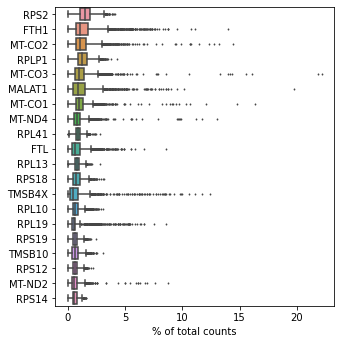

In [13]:
sc.pl.highest_expr_genes(adata, n_top=20,)

## Creating dataframe

In [14]:
adata.strings_to_categoricals()

In [15]:
adata.to_df()

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
AAACCTGAGTGTCCAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGTCTCCTATA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGGGAGGCATGTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGGGAGTGCCATT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGGGCAGGTCGTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGCTCCTCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCAAGTCTCAAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCAAGTTGTAGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCACATGAAGTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Basic filtering, marking mitochondrial genes

Filtering out cells that contain less than 200 detected genes. Filtering out genes that have been detected in less than 3 cells.

In [16]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

Annotating the group of mitochondrial genes as 'mt', then filtering out mitochondrial genes.

In [17]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with 

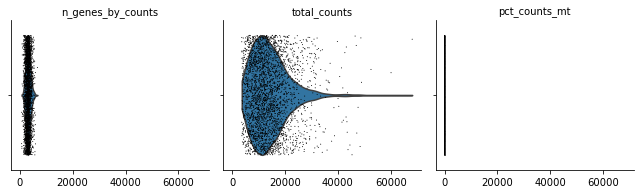

In [18]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

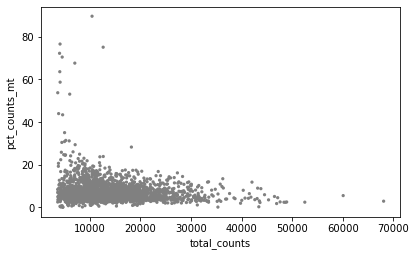

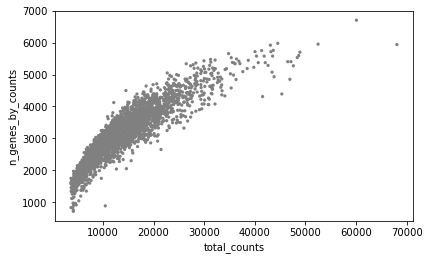

In [19]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

Removing cells that contain too many total counts or mithocondrial genes expressed based on the graphs above.

In [20]:
adata = adata[adata.obs.n_genes_by_counts < 5000, :] 
adata = adata[adata.obs.pct_counts_mt < 20, :]

Normalizing and logarithmizing.

In [21]:
sc.pp.normalize_total(adata, target_sum=1e4)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [22]:
sc.pp.log1p(adata)

Identifying and filtering highly-variable genes.

In [23]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

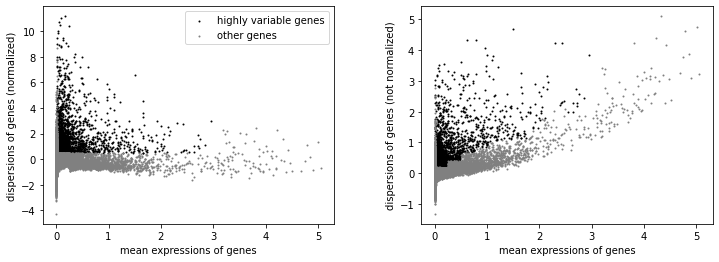

In [24]:
sc.pl.highly_variable_genes(adata)

In [25]:
adata.raw = adata

In [26]:
adata = adata[:, adata.var.highly_variable]

Regressing out the influence of total counts per cell and the percentage of expressed mitochondrial genes. Scaling and cutting out data greater than standard deviation 10.

In [27]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt']) 

In [28]:
sc.pp.scale(adata, max_value=10) 

## PCA

 Running principal component analysis (PCA) to display the main axes of variation and reduce noise in data.

In [29]:
sc.tl.pca(adata, svd_solver='arpack') 

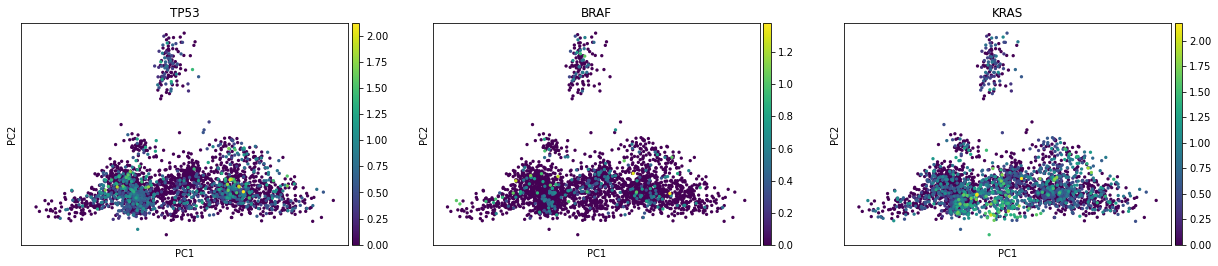

In [30]:
sc.pl.pca(adata, color= ['TP53', 'BRAF', 'KRAS'] ) 

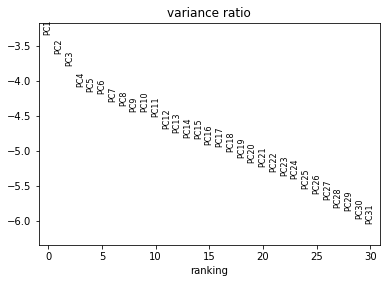

In [31]:
sc.pl.pca_variance_ratio(adata, log=True)

In [32]:
print(sorted(list(adata.var_names)))

['A1BG', 'ABCA1', 'ABCA7', 'ABCB1', 'ABCB5', 'ABCC3', 'ABCC4', 'ABCD1', 'ABHD2', 'ABI3', 'ABL2', 'ABLIM1', 'ABLIM3', 'AC002454.1', 'AC003092.1', 'AC004988.1', 'AC005355.2', 'AC006116.20', 'AC006262.5', 'AC007040.11', 'AC009336.24', 'AC009784.3', 'AC010967.2', 'AC020571.3', 'AC073218.2', 'AC073283.4', 'AC079466.1', 'AC090627.1', 'AC096677.1', 'AC098973.2', 'AC104135.3', 'AC104655.3', 'AC110619.2', 'AC147651.4', 'ACAA1', 'ACACA', 'ACAP1', 'ACER3', 'ACSL3', 'ACSL5', 'ACTA2', 'ACTG1', 'ACTG2', 'ADAM12', 'ADAM17', 'ADAM19', 'ADAMTS1', 'ADAMTS12', 'ADAMTS2', 'ADAMTS6', 'ADAP1', 'ADD1', 'ADIRF', 'ADM', 'ADORA1', 'ADORA2B', 'ADRA2C', 'AEBP1', 'AF121898.3', 'AFAP1-AS1', 'AFMID', 'AGAP6', 'AGPAT4', 'AGPAT9', 'AGR2', 'AHNAK2', 'AJAP1', 'AKAP12', 'AKR1B1', 'AKR1B10', 'AKR1C1', 'AKR1C2', 'AKR1C3', 'AL645728.1', 'ALDH1A1', 'ALDH1A2', 'ALDH1A3', 'ALDH1L1', 'ALDH2', 'ALDH3A1', 'ALDH3B2', 'ALPP', 'AMD1', 'AMIGO2', 'AMOTL1', 'ANG', 'ANGPT1', 'ANGPTL2', 'ANGPTL4', 'ANKH', 'ANKRD1', 'ANKRD10', 'ANKRD13A',

Computing neighborhood graph, embedding the graph in two dimensions using <a href="https://arxiv.org/abs/1802.03426" target="_blank">UMAP</a>.

In [33]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [34]:
sc.tl.umap(adata)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


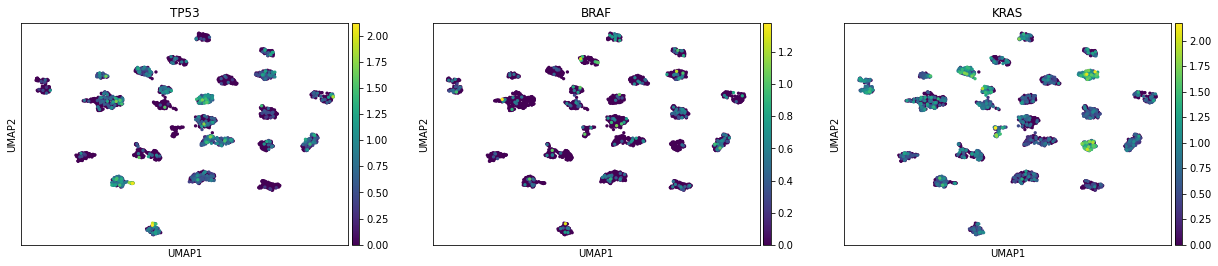

In [35]:
sc.pl.umap(adata, color=['TP53', 'BRAF', 'KRAS']) 

## Clustering the neighborhood graph

In [38]:
sc.tl.leiden(adata)

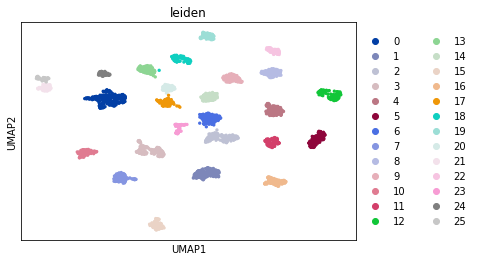

In [39]:
sc.pl.umap(adata, color=['leiden'])

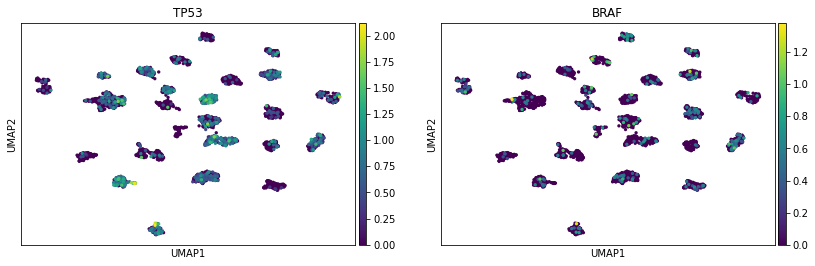

In [40]:
sc.pl.umap(adata, color=['TP53', 'BRAF'])

## Cell line annotation

Using **classification.csv** as metadata.

In [41]:
celllines = classification.singlet_ID.tolist()
test_celllist = list(set(celllines))
test_celllist.sort()
print(test_celllist)

['BICR31_UPPER_AERODIGESTIVE_TRACT', 'BICR6_UPPER_AERODIGESTIVE_TRACT', 'BT474_BREAST', 'BT549_BREAST', 'CAOV3_OVARY', 'CCFSTTG1_CENTRAL_NERVOUS_SYSTEM', 'COLO680N_OESOPHAGUS', 'COV434_OVARY', 'DKMG_CENTRAL_NERVOUS_SYSTEM', 'IALM_LUNG', 'LNCAPCLONEFGC_PROSTATE', 'LS1034_LARGE_INTESTINE', 'NCIH226_LUNG', 'NCIH2347_LUNG', 'RCC10RGB_KIDNEY', 'RCM1_LARGE_INTESTINE', 'RERFLCAD1_LUNG', 'SH10TC_STOMACH', 'SKMEL2_SKIN', 'SKMEL3_SKIN', 'SNU1079_BILIARY_TRACT', 'SQ1_LUNG', 'TEN_ENDOMETRIUM', 'UMUC1_URINARY_TRACT']


In [186]:
meta = classification

In [187]:
meta.head()

,singlet_ID,num_SNPs,singlet_dev,singlet_dev_z,singlet_margin,singlet_z_margin,doublet_z_margin,tot_reads,doublet_dev_imp,doublet_CL1,doublet_CL2,percent.mito,cell_det_rate,cell_quality,doublet_GMM_prob,DepMap_ID
barcode,,,,,,,,,,,,,,,,
AAACCTGAGTGTCCAT-1,NCIH226_LUNG,842,0.711989,11.706143,0.496774,9.320799,1.168961,1837,0.001956,NCIH226_LUNG,CCFSTTG1_CENTRAL_NERVOUS_SYSTEM,3.877204,0.126765,normal,2.957487e-07,ACH-000367
AAACCTGTCTCCTATA-1,SH10TC_STOMACH,683,0.736254,9.534310,0.481404,7.951819,0.035131,1280,0.006458,SH10TC_STOMACH,IALM_LUNG,7.131355,0.102932,normal,2.260282e-05,ACH-000764
AAACGGGAGGCATGTG-1,UMUC1_URINARY_TRACT,665,0.554539,9.149846,0.351464,7.381857,0.617185,1155,0.032373,UMUC1_URINARY_TRACT,RCC10RGB_KIDNEY,9.458037,0.097142,normal,4.258513e-01,ACH-000834
AAACGGGAGTGCCATT-1,COLO680N_OESOPHAGUS,527,0.726093,18.091927,0.539235,15.241206,2.016968,972,0.000101,COLO680N_OESOPHAGUS,UMUC1_URINARY_TRACT,4.221676,0.097601,normal,6.853547e-10,ACH-000717
AAACGGGCAGGTCGTC-1,NCIH226_LUNG,728,0.713295,8.726652,0.469219,6.658030,0.567603,1770,0.004016,NCIH226_LUNG,IALM_LUNG,2.068476,0.112214,normal,4.793686e-06,ACH-000367


In [188]:
adata.obs.head()

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,Cell type
AAACCTGAGTGTCCAT-1,4146,4146,27650.0,1071.0,3.873418,2,NCIH226_LUNG
AAACCTGTCTCCTATA-1,3364,3361,13042.0,930.0,7.130808,8,SH10TC_STOMACH
AAACGGGAGGCATGTG-1,3175,3174,15211.0,1438.0,9.453685,15,UMUC1_URINARY_TRACT
AAACGGGAGTGCCATT-1,3192,3192,13045.0,550.0,4.216175,7,COLO680N_OESOPHAGUS
AAACGGGCAGGTCGTC-1,3672,3671,25405.0,525.0,2.066522,2,NCIH226_LUNG


In [189]:
adata.obs['Cell type'] = meta.loc[adata.obs.index, 'singlet_ID']

In [190]:
adata.obs.head()

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,Cell type
AAACCTGAGTGTCCAT-1,4146,4146,27650.0,1071.0,3.873418,2,NCIH226_LUNG
AAACCTGTCTCCTATA-1,3364,3361,13042.0,930.0,7.130808,8,SH10TC_STOMACH
AAACGGGAGGCATGTG-1,3175,3174,15211.0,1438.0,9.453685,15,UMUC1_URINARY_TRACT
AAACGGGAGTGCCATT-1,3192,3192,13045.0,550.0,4.216175,7,COLO680N_OESOPHAGUS
AAACGGGCAGGTCGTC-1,3672,3671,25405.0,525.0,2.066522,2,NCIH226_LUNG


... storing 'Cell type' as categorical


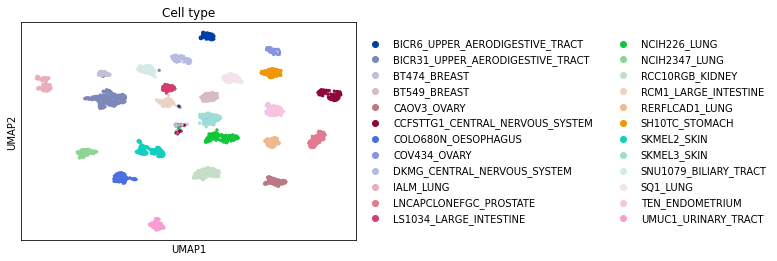

In [191]:
sc.pl.umap(adata, color='Cell type')

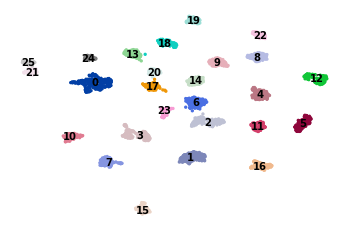

In [182]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

In [183]:
list(adata.obs['Cell type'].unique())

['NCIH226_LUNG',
 'SH10TC_STOMACH',
 'UMUC1_URINARY_TRACT',
 'COLO680N_OESOPHAGUS',
 'DKMG_CENTRAL_NERVOUS_SYSTEM',
 'NCIH2347_LUNG',
 'RCC10RGB_KIDNEY',
 'SKMEL3_SKIN',
 'CCFSTTG1_CENTRAL_NERVOUS_SYSTEM',
 'BICR6_UPPER_AERODIGESTIVE_TRACT',
 'IALM_LUNG',
 'LS1034_LARGE_INTESTINE',
 'BICR31_UPPER_AERODIGESTIVE_TRACT',
 'RCM1_LARGE_INTESTINE',
 'COV434_OVARY',
 'TEN_ENDOMETRIUM',
 'LNCAPCLONEFGC_PROSTATE',
 'SQ1_LUNG',
 'SNU1079_BILIARY_TRACT',
 'CAOV3_OVARY',
 'SKMEL2_SKIN',
 'BT549_BREAST',
 'RERFLCAD1_LUNG',
 'BT474_BREAST']